In [330]:
import datetime
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
from salishsea_tools import places
import xarray as xr

%matplotlib inline

In [331]:
T1path = Path('/data/sallen/results/MEOPAR/tuning/tuning1')
T2path = Path('/data/sallen/results/MEOPAR/tuning/tuning2')

In [341]:
def chl_plot(ax, basefiles, T1files, T2files):

    for basefile in basefiles:
        filein = open(basefile, 'rb')
        base = pickle.load(filein)
        for i in range(len(base)):
            base[i].plot(ax=ax, color='blue')
        filein.close()
        
    for T1file in T1files:
        T1 = xr.open_dataset(T1path/T1file)
        (T1.diatoms[:, 0, 0, 0]+T1.flagellates[:, 0, 0, 0]+T1.ciliates[:, 0, 0, 0]).plot(ax=ax, color='purple')
        T1.close()  
        
    for T2file in T2files:
        T2 = xr.open_dataset(T2path/T2file)
        (T2.diatoms[:, 0, 0, 0]+T2.flagellates[:, 0, 0, 0]+T2.ciliates[:, 0, 0, 0]).plot(ax=ax, color='darkgreen')
        T2.close()  

In [333]:
def bloom_timing(T1files, T1Nfiles, T2files, T2Nfiles, startdate, enddate):
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    ax2 = ax.twinx()
    
    for T1file in T1files:
        T1 = xr.open_dataset(T1path/T1file)
        (T1.diatoms[:, 0, 0, 0]+T1.flagellates[:, 0, 0, 0]+T1.ciliates[:, 0, 0, 0]).plot(ax=ax, color='purple')
        T1.close() 
        
    for T1file in T1Nfiles:
        T1 = xr.open_dataset(T1path/T1file)
        (T1.nitrate[:, 0, 0, 0]).plot(ax=ax2, color='pink')
        T1.close() 
    
    for T2file in T2files:
        T2 = xr.open_dataset(T2path/T2file)
        (T2.diatoms[:, 0, 0, 0]+T2.flagellates[:, 0, 0, 0]+T2.ciliates[:, 0, 0, 0]).plot(ax=ax, color='darkgreen')
        T2.close() 
        
    for T2file in T2Nfiles:
        T2 = xr.open_dataset(T2path/T2file)
        (T2.nitrate[:, 0, 0, 0]).plot(ax=ax2, color='lime')
        T2.close() 
        
    ax.set_xlim(startdate, enddate)
    ax2.set_ylim(0, 2) 
    ax.grid(axis='x')
    ax2.grid(axis='y')

## 2015

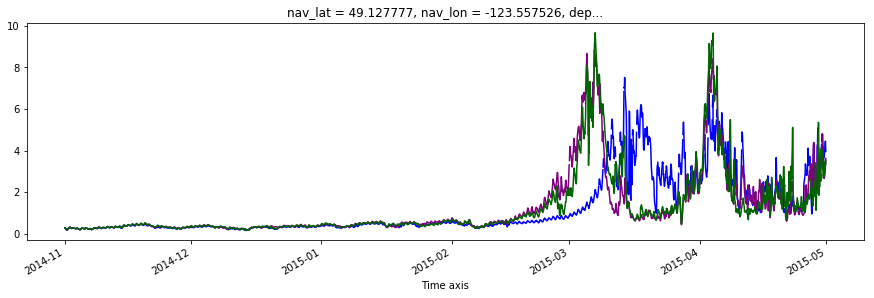

In [334]:
basefiles = ['novdec2014_base.pkl', 'janfeb2015_base.pkl', 'marapr2015_base.pkl']
Tsfiles = ['01nov14/S3_201411-201411.nc', '01nov14/S3_201412-201412.nc', '01nov14/S3_201501-201501.nc', 
           '01nov14/S3_201502-201502.nc', '01nov14/S3_201503-201503.nc', '01nov14/S3_201504-201504.nc']
chl_plot(basefiles, Tsfiles, Tsfiles)

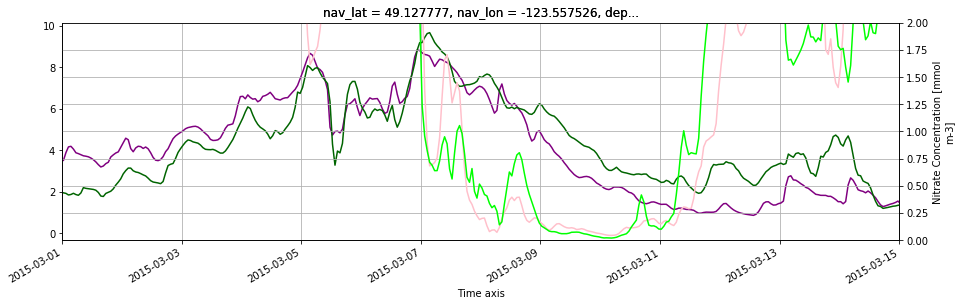

In [335]:
bloom_timing(Tsfiles, Tsfiles, Tsfiles, Tsfiles, datetime.datetime(2015, 3, 1), datetime.datetime(2015, 3, 15))

## 2016

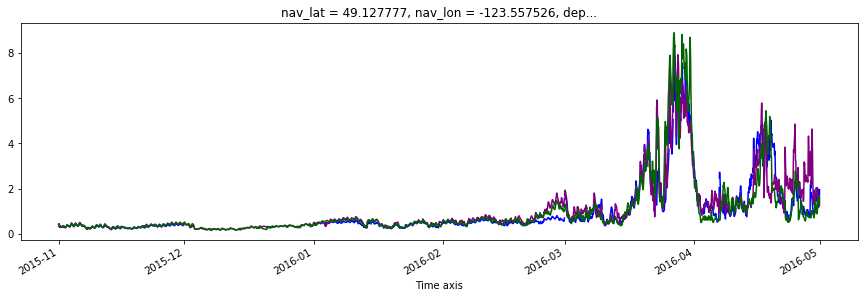

In [336]:
basefiles = ['nov2015_base.pkl', 'janfeb2016_base.pkl', 'marapr2016_T1.pkl']
T1files = ['01nov15_secondtime/S3_201511-201511.nc', '01nov15_secondtime/S3_201512-201512.nc', 
           '01nov15_secondtime/S3_201601-201601.nc', '01nov15_secondtime/S3_201602-201602.nc',
          '01mar16_secondtime/S3_201603-201603.nc', '01mar16_secondtime/S3_201604-201604.nc']
T2files = ['01nov15/S3_201511-201511.nc', '01nov15/S3_201512-201512.nc', 
           '01nov15/S3_201601-201601.nc', '01nov15/S3_201602-201602.nc',
          '01nov15/S3_201603-201603.nc', '01nov15/S3_201604-201604.nc']
chl_plot(basefiles, T1files, T2files)

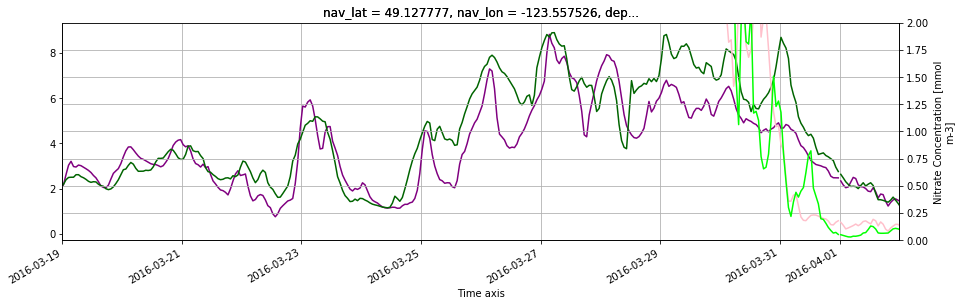

In [337]:
bloom_timing(T1files, T1files, T2files, T2files, datetime.datetime(2016, 3, 19), datetime.datetime(2016, 4, 2))

## 2017

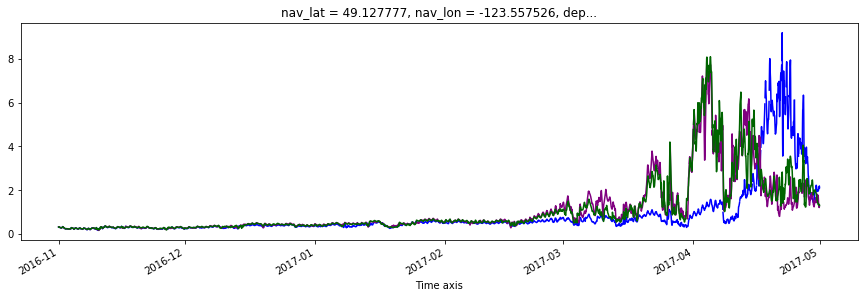

In [338]:
basefiles = ['nov2016_base.pkl', 'dec2016_base.pkl', 'jan2017_base.pkl', 'feb2017_base.pkl', 'mar2017_base.pkl',
            'apr2017_base.pkl']
T1files = ['01nov16/S3_201611-201611.nc', '01nov16/S3_201612-201612.nc', '01nov16/S3_201701-201701.nc', 
           '01nov16/S3_201702-201702.nc', '01nov16/S3_201703-201703.nc', '31mar17/S3_201703-201704.nc']
T2files = ['01nov16/S3_201611-201611.nc', '01nov16/S3_201612-201612.nc', '01nov16/S3_201701-201701.nc', 
           '01nov16/S3_201702-201702.nc', '01nov16/S3_201703-201703.nc', '01nov16/S3_201704-201704.nc']
chl_plot(basefiles, T1files, T2files)

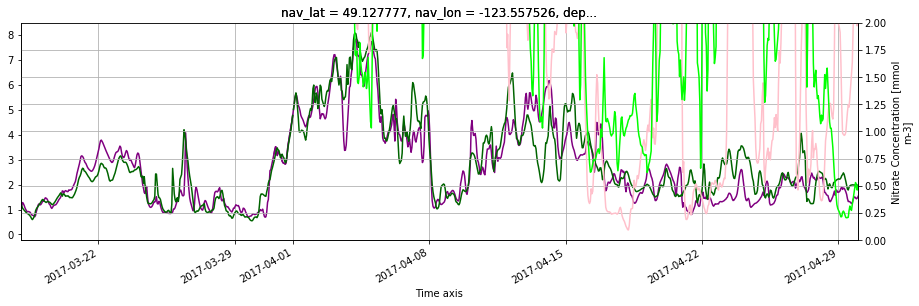

In [340]:
bloom_timing(T1files, T1files, T2files, T2files, datetime.datetime(2017, 3, 18), datetime.datetime(2017, 4, 30))

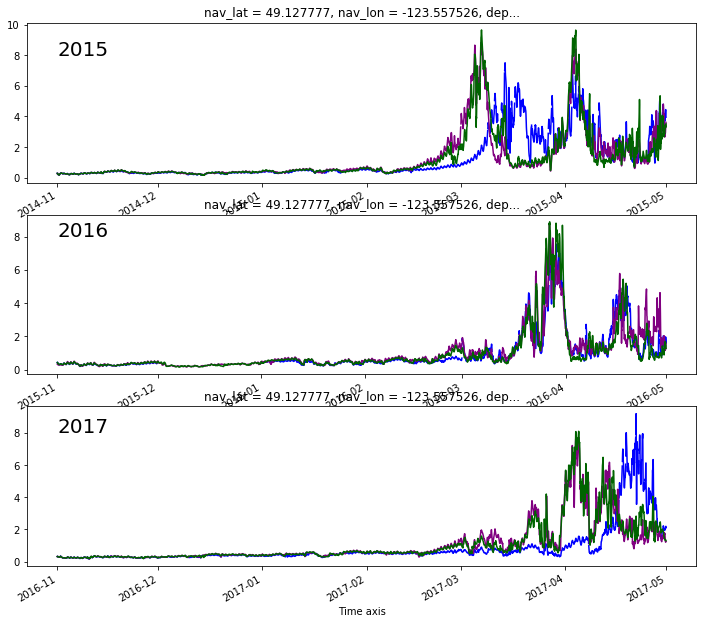

In [351]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
basefiles = ['novdec2014_base.pkl', 'janfeb2015_base.pkl', 'marapr2015_base.pkl']
Tsfiles = ['01nov14/S3_201411-201411.nc', '01nov14/S3_201412-201412.nc', '01nov14/S3_201501-201501.nc', 
           '01nov14/S3_201502-201502.nc', '01nov14/S3_201503-201503.nc', '01nov14/S3_201504-201504.nc']
chl_plot(axs[0], basefiles, Tsfiles, Tsfiles)
axs[0].text(datetime.datetime(2014, 11, 1), 8, '2015', fontsize=20)
basefiles = ['nov2015_base.pkl', 'janfeb2016_base.pkl', 'marapr2016_T1.pkl']
T1files = ['01nov15_secondtime/S3_201511-201511.nc', '01nov15_secondtime/S3_201512-201512.nc', 
           '01nov15_secondtime/S3_201601-201601.nc', '01nov15_secondtime/S3_201602-201602.nc',
          '01mar16_secondtime/S3_201603-201603.nc', '01mar16_secondtime/S3_201604-201604.nc']
T2files = ['01nov15/S3_201511-201511.nc', '01nov15/S3_201512-201512.nc', 
           '01nov15/S3_201601-201601.nc', '01nov15/S3_201602-201602.nc',
          '01nov15/S3_201603-201603.nc', '01nov15/S3_201604-201604.nc']
chl_plot(axs[1], basefiles, T1files, T2files)
axs[1].text(datetime.datetime(2015, 11, 1), 8, '2016', fontsize=20)
basefiles = ['nov2016_base.pkl', 'dec2016_base.pkl', 'jan2017_base.pkl', 'feb2017_base.pkl', 'mar2017_base.pkl',
            'apr2017_base.pkl']
T1files = ['01nov16/S3_201611-201611.nc', '01nov16/S3_201612-201612.nc', '01nov16/S3_201701-201701.nc', 
           '01nov16/S3_201702-201702.nc', '01nov16/S3_201703-201703.nc', '31mar17/S3_201703-201704.nc']
T2files = ['01nov16/S3_201611-201611.nc', '01nov16/S3_201612-201612.nc', '01nov16/S3_201701-201701.nc', 
           '01nov16/S3_201702-201702.nc', '01nov16/S3_201703-201703.nc', '01nov16/S3_201704-201704.nc']
chl_plot(axs[2], basefiles, T1files, T2files)
axs[2].text(datetime.datetime(2016, 11, 1), 8, '2017', fontsize=20);

## Chl Time Series at S3